# Generating random shapes

This notebook demonstrates generation of random shapes with various properties.<br>
It uses the `random_shapes()` function from `skimage.draw`.

In [1]:
import matplotlib.pyplot as plt

from skimage.draw import random_shapes

### Let's start simple and generate a 128x128 image with a single grayscale rectangle.
We get back a tuple consisting of 
1. The image with the generated shapes and 
2. A list of label tuples with the kind of shape (e.g. circle, rectangle) and ((r0, r1), (c0, c1)) coordinates.

In [2]:
rect = random_shapes((128, 128), max_shapes=1, shape='rectangle',
                       multichannel=False)

In [17]:
image, labels = rect
print('Image shape: {}\nLabels: {}'.format(image.shape, labels))

Image shape: (128, 128)
Labels: [('rectangle', ((45, 69), (20, 52)))]


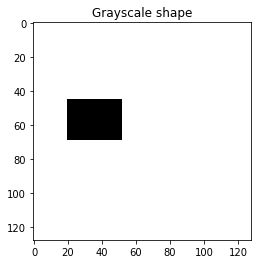

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(4,4))
ax.imshow(image, cmap='gray')
ax.set_title('Grayscale shape')
plt.show()

### The generated images can be much more complex 
For example, let's try many shapes of any color. If we want the colors to be particularly light, we can set the `intensity_range` to an upper subrange of (0,255).

In [19]:
image1, _ = random_shapes((128, 128), max_shapes=10,
                          intensity_range=((100, 255),))
image2, _ = random_shapes((128, 128), max_shapes=10,
                          intensity_range=((200, 255),))
image3, _ = random_shapes((128, 128), max_shapes=10,
                          intensity_range=((50, 255),))
image4, _ = random_shapes((128, 128), max_shapes=10,
                          intensity_range=((0, 255),))

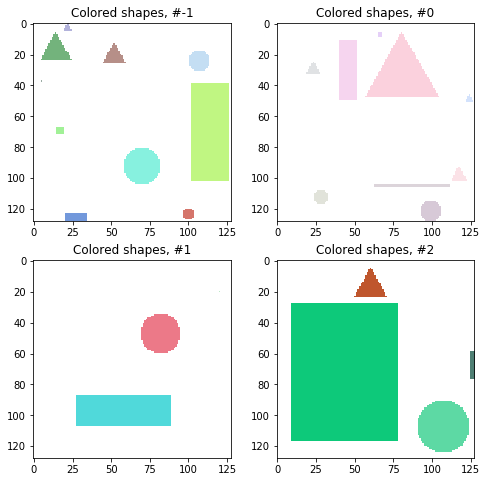

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(8,8))
ax = axes.ravel()
for i, image in enumerate([image1, image2, image3, image4], 0):
    ax[i].imshow(image)
    ax[i].set_title('Colored shapes, #{}'.format(i-1))
plt.show()

### Overlapping shapes
These shapes are well suited to test segmentation algorithms. Often, we want shapes to overlap to test the algorithm.

In [32]:
image, _ = random_shapes((128, 128), min_shapes=5, max_shapes=6,
                         min_size=20, allow_overlap=True)

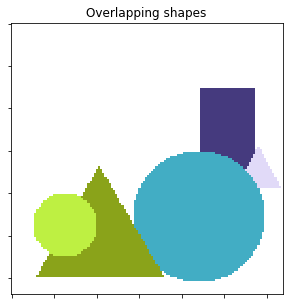

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(5,5))
ax.imshow(image)
ax.set_title('Overlapping shapes')
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()